I wrote GD in the form of a module, just to be able to add more algorithms and test it easiy.

It includes more algorithm. You can find them in [1609.04747](https://arxiv.org/abs/1609.04747).

This is how it works

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import GD

In [3]:
def func(x):
    return 1-np.exp(-(x[0]**2+x[1]**2))

In [4]:
target=GD.targetFunc(func)

In [9]:
# gd=GD.VanillaGD(target,[-0.5,0.2],alpha=1e-2)
# gd=GD.AdaDeltaGD(target,[-0.5,0.2],gamma=1-1e-2,epsilon=1e-6,alpha=1)
# gd=GD.RMSpropGD(target,[-0.5,0.2],gamma=1-1e-3,epsilon=1e-5,alpha=1e-2)
# gd=GD.AdamGD(target,[-0.5,0.2],beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# gd=GD.AdaMaxGD(target,[-0.5,0.2],beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
gd=GD.NAdamGD(target,[-0.5,0.2],beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)


gd.run(abs_tol=1e-6, rel_tol=1e-6, step_break=100,max_step=50000),len(gd.steps)

([5.924073760083431e-10, -6.137168119839986e-13], 313)

<IPython.core.display.Javascript object>


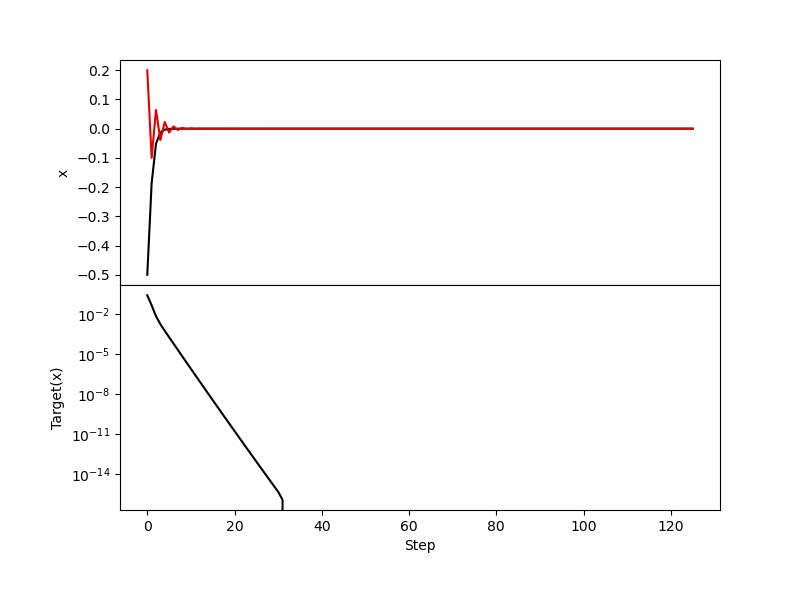

In [6]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)
sub.plot(np.array(gd.steps)[:,0],c='xkcd:black')
sub.plot(np.array(gd.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
sub.plot([target(i) for i in gd.steps],c='xkcd:black')

sub.set_ylabel('Target(x)')

# sub.set_xscale('log')
sub.set_yscale('log')

sub.set_xlabel('Step')

plt.show()